In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from google.colab import files

# Subir imagen
uploaded = files.upload()

Saving IMG_8736.JPEG to IMG_8736.JPEG


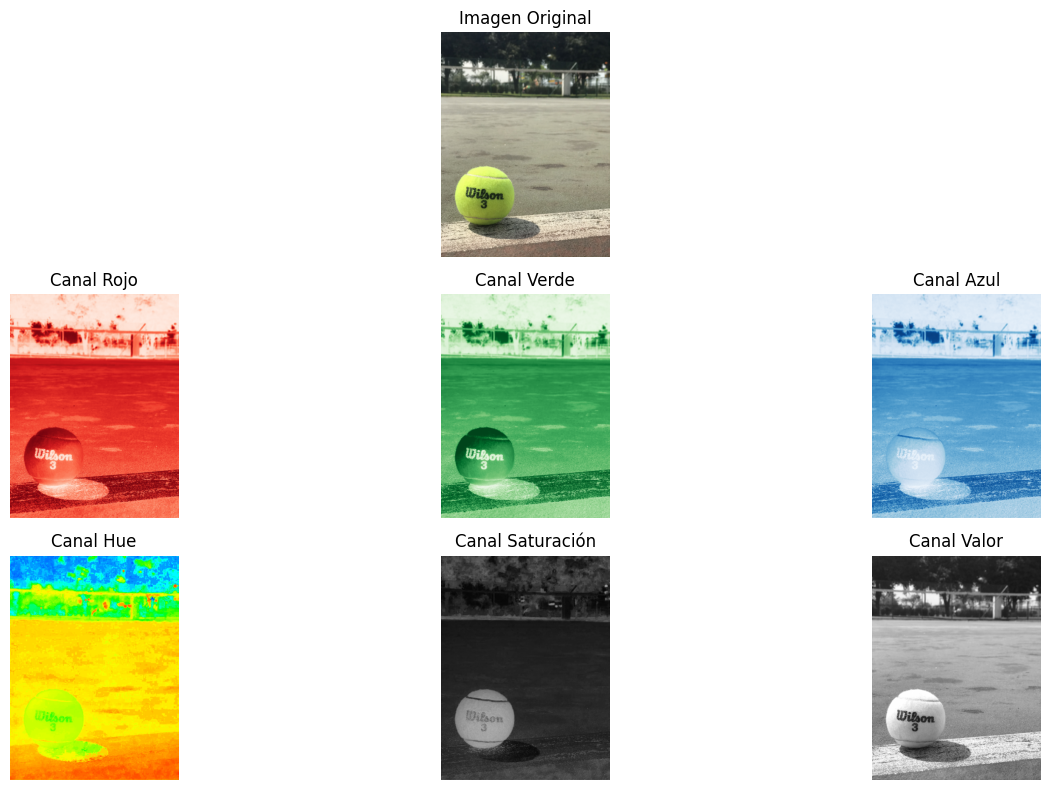

In [8]:
# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]

# Cargar la imagen en color (BGR por defecto en OpenCV)
imagen_bgr = cv2.imread(filename)

# Convertir de BGR a RGB para mostrar correctamente con matplotlib
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

# Separar canales RGB
R, G, B = cv2.split(imagen_rgb)

# Convertir a HSV y separar canales
imagen_hsv = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(imagen_hsv)

# Mostrar imagen original y canales
plt.figure(figsize=(14, 8))

# Imagen original
plt.subplot(3, 3, 2), plt.imshow(imagen_rgb), plt.title('Imagen Original'), plt.axis('off')

# Canales RGB
plt.subplot(3, 3, 4), plt.imshow(R, cmap='Reds'), plt.title('Canal Rojo'), plt.axis('off')
plt.subplot(3, 3, 5), plt.imshow(G, cmap='Greens'), plt.title('Canal Verde'), plt.axis('off')
plt.subplot(3, 3, 6), plt.imshow(B, cmap='Blues'), plt.title('Canal Azul'), plt.axis('off')

# Canales HSV
plt.subplot(3, 3, 7), plt.imshow(H, cmap='hsv'), plt.title('Canal Hue'), plt.axis('off')
plt.subplot(3, 3, 8), plt.imshow(S, cmap='gray'), plt.title('Canal Saturación'), plt.axis('off')
plt.subplot(3, 3, 9), plt.imshow(V, cmap='gray'), plt.title('Canal Valor'), plt.axis('off')

plt.tight_layout()
plt.show()

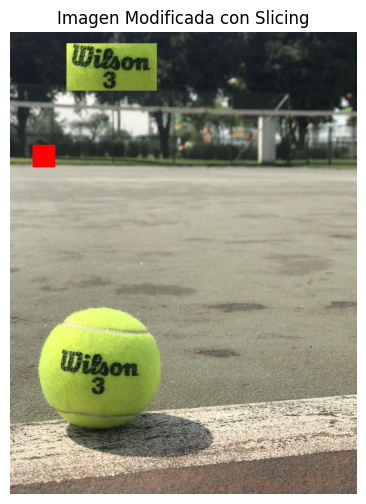

In [24]:
# Copia de la imagen para modificar sin alterar la original
modificada = imagen_rgb.copy()

# --- 1. Cambiar el color de un área rectangular ---
# Coordenadas del rectángulo: fila_inicio:fila_fin, columna_inicio:columna_fin
modificada[500:600, 100:200] = [255, 0, 0]  # Rojo (en RGB)

# --- 2. Sustituir una región por otra parte de la imagen ---
# Seleccionar una región origen
region_origen = imagen_rgb[1405:1615, 200:600]

# Pegar la región en otra ubicación (asegúrate de que encaje en tamaño)
modificada[50:260, 250:650] = region_origen

# Mostrar la imagen modificada
plt.figure(figsize=(8, 6))
plt.imshow(modificada)
plt.title('Imagen Modificada con Slicing')
plt.axis('off')
plt.show()

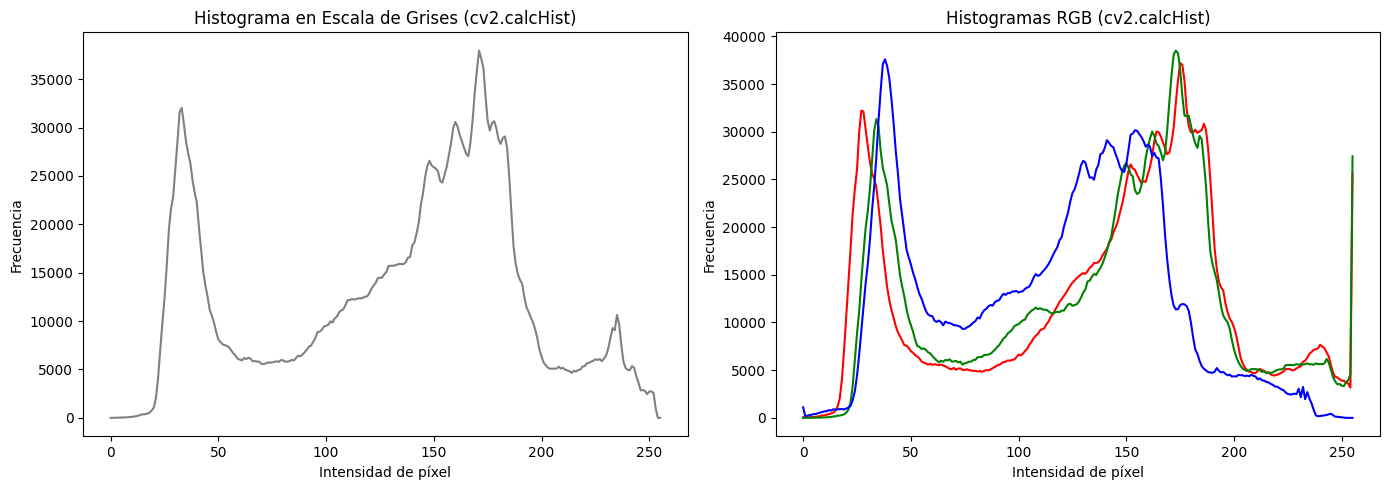

In [25]:
# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

# --- 1. Histograma en escala de grises usando cv2.calcHist ---
hist_gris = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_gris, color='gray')
plt.title('Histograma en Escala de Grises (cv2.calcHist)')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')

# --- 2. Histogramas de R, G, B ---
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([imagen_rgb], [i], None, [256], [0, 256])
    plt.subplot(1, 2, 2)
    plt.plot(hist, color=color)
    plt.title('Histogramas RGB (cv2.calcHist)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

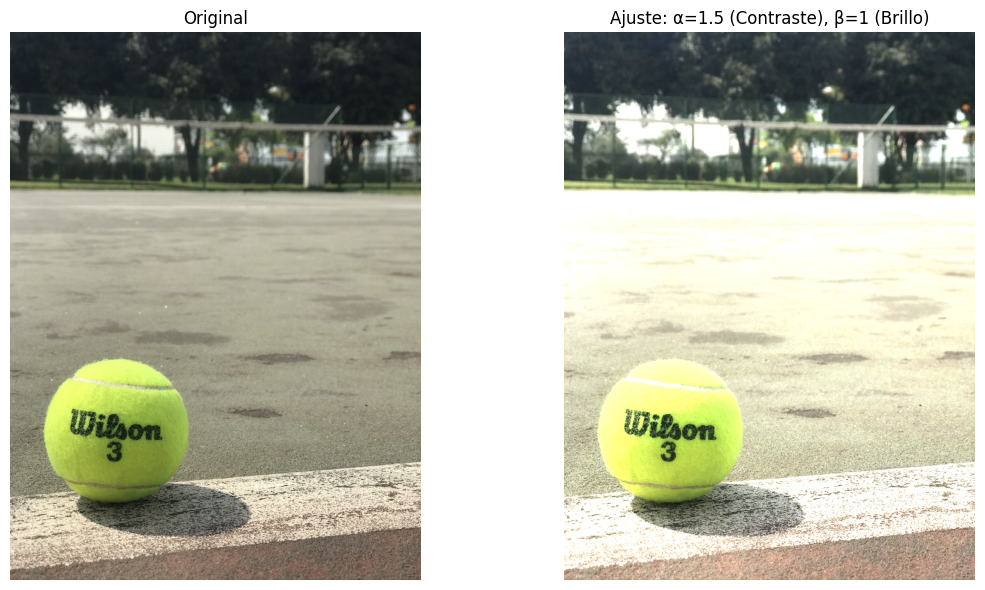

In [35]:
# Ajuste manual de brillo y contraste
def ajustar_brillo_contraste(img, alpha, beta):
    # Convertimos a float32 para evitar saturación en el cálculo
    img_float = img.astype(np.float32)

    # Aplicar la fórmula
    img_ajustada = alpha * img_float + beta

    # Recortar valores fuera del rango [0, 255] y convertir de nuevo a uint8
    img_ajustada = np.clip(img_ajustada, 0, 255).astype(np.uint8)

    return img_ajustada

# Parámetros
alpha = 1.5  # contraste (1.0 = sin cambio)
beta = 1   # brillo (0 = sin cambio)

# Aplicar ajuste
imagen_ajustada = ajustar_brillo_contraste(imagen_rgb, alpha, beta)

# Mostrar imágenes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(imagen_rgb), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(imagen_ajustada), plt.title(f'Ajuste: α={alpha} (Contraste), β={beta} (Brillo)'), plt.axis('off')
plt.tight_layout()
plt.show()
